In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def eta_f_Ai (n : int, f : float) -> float:
    a1 = 0.6446930
    a2 = 0.22908
    a3 = 4.874
    minus_a4 = 6.158
    tet_minus_F = 0.06
    temp = (a1 + a2*np.sqrt( (n-2)/(2*f) )*tet_minus_F)
    return (1 + temp**a3)**minus_a4

def eta_deltaE_Peff (p_eff : float, ref_T = 450, dE = 2.9) -> float:
    # "pressure" is the the pressure effect in Pa
    # dE is in k cal
    factor = (dE*4.18*1000 + p_eff)/(8.413*ref_T)
    return np.exp(factor)

In [5]:
f_term = eta_f_Ai(n=292, f=0.53969)
energy_term = eta_deltaE_Peff(p_eff=2881.4369, ref_T=450)
eta_infinit = 1.1509127/(592*f_term*energy_term)
print(eta_infinit)

2.9539855369970607e-06


In [6]:
n_bead = 592 # M2 = 
viscosity = 1.1509127

## f and P_eff are from the table (results form the codes are should be for n/2.
#                                   See README.md file)
f_term = eta_f_Ai(n=n_bead, f=0.53969)
energy_term = eta_deltaE_Peff(p_eff=2881.4369, ref_T=450)
eta_infinit = viscosity/(n_bead*f_term*energy_term)
print(eta_infinit)

8.502617114822596e-07


In [7]:
n_bead = 1000
viscosity = 4.331164

f_term = eta_f_Ai(n=n_bead, f=0.546769)
energy_term = eta_deltaE_Peff(p_eff=2841.71797, ref_T=450)
viscosity = eta_infinit*n_bead * energy_term * f_term

eta_infinit = viscosity/(n_bead*f_term*energy_term)
print(eta_infinit)


8.502617114822595e-07


# Testing the eta_inf value 

[ 515.11948726  748.23478248 2531.78674804]
[9.61335442792168e-07, 4.5881015256441176e-07, 1.0774800257305203e-08]
Mean value of eta_inf is: 
 4.769734652046283e-07


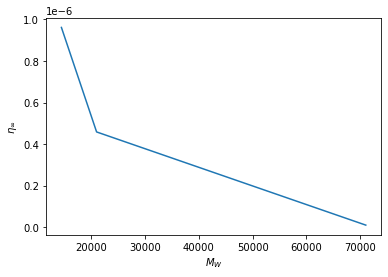

In [9]:
# For T = 450:
temperature = 450

mw  = [14450.75, 20990.38, 71024.72]
eta = [4.331164, 1.27944649e+01, 1.86213456e+03]

n_beads = np.array(mw)/14.0266
n_beads_for_code = n_beads/2
print(n_beads_for_code)
f_values = [0.5429639, 0.54515, 0.551157]
p_eff_values = [2863.11810, 2850.8134, 2816.93823]
eta_infinit = []
eta_inf_dic = {}
for itr in range(len(mw)):

    f_term = eta_f_Ai(n=n_beads[itr], f=f_values[itr])
    # energy_term = eta_deltaE_Peff(p_eff=p_eff_values[itr], ref_T=temperature)
    # viscosity = eta_infinit*n_bead * energy_term * f_term

    eta_infinit.append(eta[itr]/(n_beads[itr]*f_term*np.sqrt(temperature)))

print(eta_infinit)
eta_inf_dic [temperature] = eta_infinit
print('Mean value of eta_inf is: \n', str(np.mean(eta_infinit)))
plt.plot(mw, eta_infinit)
plt.xlabel("$M_W$")
plt.ylabel(r"${\eta}_{\infty}$")
plt.show()

In [16]:
eta_inf = np.mean(list(eta_inf_dic.values()))

eta_inf = eta_inf_dic[450][0]

temperature = 480
mw = 31093
n_beads = int(np.round(mw/14.0266, decimals=0))

f_term = eta_f_Ai(n=n_beads, f=0.5608844193)
energy_term = eta_deltaE_Peff(p_eff=2945.69429170, ref_T=temperature)

viscosity = n_beads*eta_inf*energy_term*f_term
print("The approximated voscosity is:  "+str(viscosity))
print("The viscosity from the plot is: "+str(3.71419414e+01))

The approximated voscosity is:  475.4641821155267
The viscosity from the plot is: 37.1419414


In [20]:
mw  = [14450.75, 20990.38, 71024.72]
eta = [4.331164, 1.27944649e+01, 1.86213456e+03]
n_beads_plot = np.array(mw)/14.0266
print(n_beads_plot)

temperature = 450


n_beads = 1000

f_from_table1 = 0.543
p_from_table2 = 2864

f_term = eta_f_Ai(n=n_beads, f=f_from_table1)
energy_term = eta_deltaE_Peff(p_eff=p_from_table2, ref_T=temperature)
# viscosity = eta_infinit*n_beads * energy_term * f_term

eta_infinit = eta[0]/(n_beads*f_term*np.sqrt(temperature))
print(eta_infinit)


[1030.23897452 1496.46956497 5063.57349607]
1.0966544317406481e-06


In [23]:
# mw  = [14450.75, 20990.38, 71024.72]
eta = [3.30410013e+01]
n_beads_plot = np.array(mw)/14.0266
print(n_beads_plot)

temperature = 450


n_beads = 2000

f_from_table1 = 0.547
p_from_table2 = 2841

f_term = eta_f_Ai(n=n_beads, f=f_from_table1)
energy_term = eta_deltaE_Peff(p_eff=p_from_table2, ref_T=temperature)
# viscosity = eta_infinit*n_beads * energy_term * f_term

eta_infinit = eta[0]/(n_beads*f_term*np.sqrt(temperature))
print(eta_infinit)


[1030.23897452 1496.46956497 5063.57349607]
2.2154706257946567e-07
